<a href="https://colab.research.google.com/github/djiraffs/Deep-Learning/blob/main/Week%203/Week_3_Tugas_SVHN_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metode TensorFlow

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load SVHN dataset
def preprocess(features):
    image = tf.cast(features["image"], tf.float32) / 255.0
    label = tf.one_hot(features["label"], depth=10)
    return image, label

dataset, info = tfds.load("svhn_cropped", split=["train", "test"], as_supervised=False, with_info=True)
train_data, test_data = dataset
train_data = train_data.map(preprocess).batch(64).shuffle(1000)
test_data = test_data.map(preprocess).batch(64)

# Define MLP Model
mlp_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Define CNN Model
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile and Train Models
for model, name in zip([mlp_model, cnn_model], ["MLP", "CNN"]):
    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])
    model.fit(train_data, epochs=10, validation_data=test_data)

    # Evaluate Model
    y_true, y_pred = [], []
    for images, labels in test_data:
        preds = model.predict(images)
        y_true.extend(np.argmax(labels.numpy(), axis=1))
        y_pred.extend(np.argmax(preds, axis=1))

    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    print(f"{name} Model - Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 52s 36ms/step - accuracy: 0.1765 - loss: 2.3098 - val_accuracy: 0.1959 - val_loss: 2.1916
Epoch 2/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 85s 40ms/step - accuracy: 0.1909 - loss: 2.2202 - val_accuracy: 0.1959 - val_loss: 2.1720
Epoch 3/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 53s 39ms/step - accuracy: 0.1847 - loss: 2.2117 - val_accuracy: 0.1959 - val_loss: 2.1832
Epoch 4/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 50s 36ms/step - accuracy: 0.1888 - loss: 2.2040 - val_accuracy: 0.1959 - val_loss: 2.1726
Epoch 5/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.1883 - loss: 2.2044 - val_accuracy: 0.1959 - val_loss: 2.1857
Epoch 6/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 51s 37ms/step - accuracy: 0.1868 - loss: 2.2041 - val_accuracy: 0.1959 - val_loss: 2.1751
Epoch 7/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 50s 37ms/step - accuracy: 0.1877 - loss: 2.2061 - val_accuracy: 0.1959 - val_loss: 2.1742
Epoch 8/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 51s 38ms/step - accuracy: 0.1873 - loss: 2.20

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1145/1145 ━━━━━━━━━━━━━━━━━━━━ 222s 182ms/step - accuracy: 0.4777 - loss: 1.5158 - val_accuracy: 0.8521 - val_loss: 0.5094
Epoch 2/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 198s 165ms/step - accuracy: 0.8468 - loss: 0.5116 - val_accuracy: 0.8806 - val_loss: 0.4072
Epoch 3/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 207s 169ms/step - accuracy: 0.8784 - loss: 0.4112 - val_accuracy: 0.8880 - val_loss: 0.3865
Epoch 4/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 221s 185ms/step - accuracy: 0.8934 - loss: 0.3583 - val_accuracy: 0.9001 - val_loss: 0.3538
Epoch 5/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 196s 163ms/step - accuracy: 0.9024 - loss: 0.3279 - val_accuracy: 0.9007 - val_loss: 0.3535
Epoch 6/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 194s 162ms/step - accuracy: 0.9133 - loss: 0.2956 - val_accuracy: 0.9032 - val_loss: 0.3430
Epoch 7/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 194s 162ms/step - accuracy: 0.9175 - loss: 0.2753 - val_accuracy: 0.9073 - val_loss: 0.3362
Epoch 8/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 196s 163ms/step - accuracy: 0.9

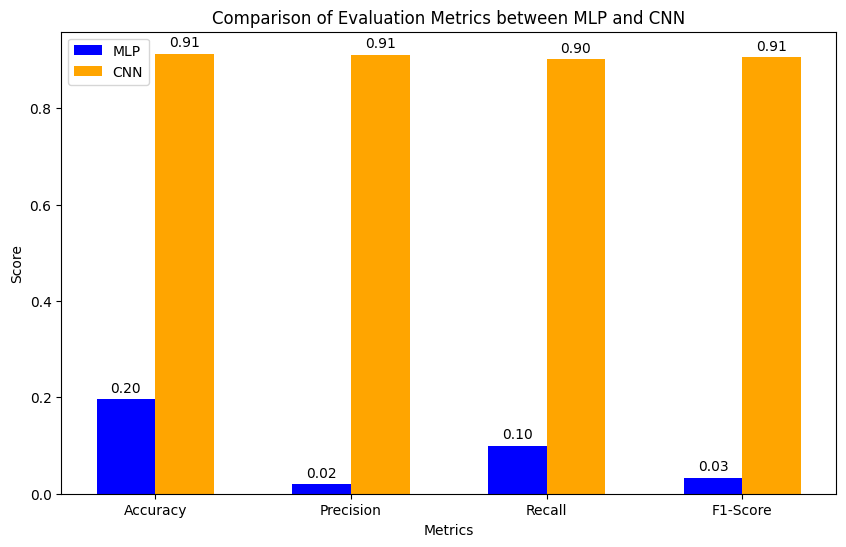

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics from the main program
labels = ["Accuracy", "Precision", "Recall", "F1-Score"]
mlp_metrics = [0.1959, 0.0196, 0.1000, 0.0328]
cnn_metrics = [0.9133, 0.9109, 0.9021, 0.9062]

# Plot bar chart
x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, mlp_metrics, width, label='MLP', color='blue')
rects2 = ax.bar(x + width/2, cnn_metrics, width, label='CNN', color='orange')

ax.set_xlabel("Metrics")
ax.set_ylabel("Score")
ax.set_title("Comparison of Evaluation Metrics between MLP and CNN")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


# Metode Pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Load SVHN dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.SVHN(root="./data", split="train", download=True, transform=transform)
test_dataset = datasets.SVHN(root="./data", split="test", download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(32*32*3, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Define CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Training Function
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

# Evaluation Function
def evaluate_model(model, test_loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    return y_true, y_pred

# Define Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Train and Evaluate MLP Model
mlp_model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)
train_model(mlp_model, train_loader, criterion, optimizer)
y_true_mlp, y_pred_mlp = evaluate_model(mlp_model, test_loader)

# Train and Evaluate CNN Model
cnn_model = CNN().to(device)
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)
train_model(cnn_model, train_loader, criterion, optimizer)
y_true_cnn, y_pred_cnn = evaluate_model(cnn_model, test_loader)

# Compute Metrics
def compute_metrics(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f"{model_name} Model - Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

compute_metrics(y_true_mlp, y_pred_mlp, "MLP")
compute_metrics(y_true_cnn, y_pred_cnn, "CNN")

# Save Predictions
np.save("mlp_predictions.npy", y_pred_mlp)
np.save("cnn_predictions.npy", y_pred_cnn)
np.save("true_labels.npy", y_true_mlp)



Epoch 1/10, Loss: 1.6567
Epoch 2/10, Loss: 1.2871
Epoch 3/10, Loss: 1.1938
Epoch 4/10, Loss: 1.1441
Epoch 5/10, Loss: 1.0990
Epoch 6/10, Loss: 1.0759
Epoch 7/10, Loss: 1.0487
Epoch 8/10, Loss: 1.0246
Epoch 9/10, Loss: 1.0130
Epoch 10/10, Loss: 0.9956
Epoch 1/10, Loss: 1.1533
Epoch 2/10, Loss: 0.5012
Epoch 3/10, Loss: 0.4094
Epoch 4/10, Loss: 0.3597
Epoch 5/10, Loss: 0.3215
Epoch 6/10, Loss: 0.2932
Epoch 7/10, Loss: 0.2718
Epoch 8/10, Loss: 0.2513
Epoch 9/10, Loss: 0.2356
Epoch 10/10, Loss: 0.2178
MLP Model - Accuracy: 0.7198, Precision: 0.7622, Recall: 0.6833, F1 Score: 0.7090
CNN Model - Accuracy: 0.9148, Precision: 0.9062, Recall: 0.9074, F1 Score: 0.9058


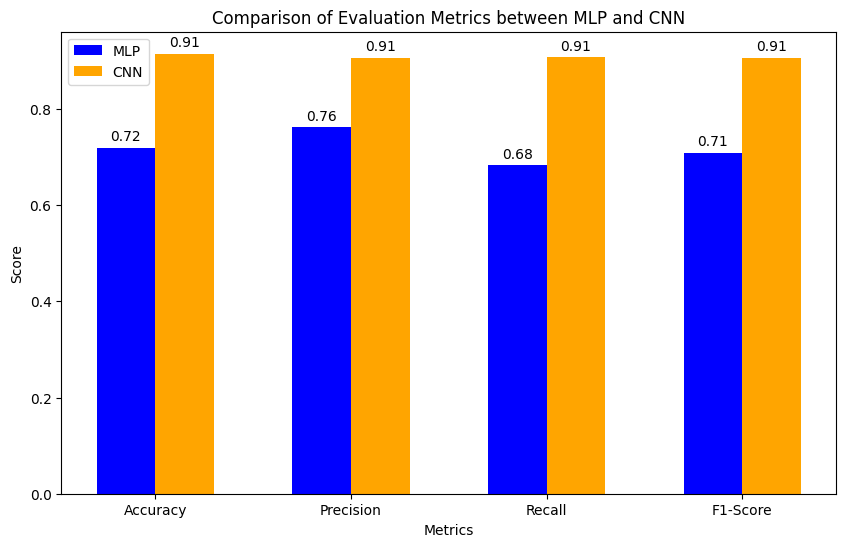

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics from the main program
labels = ["Accuracy", "Precision", "Recall", "F1-Score"]
mlp_metrics = [0.7198, 0.7622, 0.6833, 0.7090]
cnn_metrics = [0.9148, 0.9062, 0.9074, 0.9058]

# Plot bar chart
x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, mlp_metrics, width, label='MLP', color='blue')
rects2 = ax.bar(x + width/2, cnn_metrics, width, label='CNN', color='orange')

ax.set_xlabel("Metrics")
ax.set_ylabel("Score")
ax.set_title("Comparison of Evaluation Metrics between MLP and CNN")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()
